In [1]:
import keypress_recognition.models as models
from keypress_recognition import dataset_p as dataset
import numpy as np
import matplotlib.pyplot as plt
import cv2
%load_ext autoreload
%autoreload 2

In [2]:
concat = False
delta = 3 if concat else 1
channels = 3 * delta

In [4]:
dataset.load_all_data(color=['white'], size=['bundle'], keypress=True, concatenate=concat, delta=delta)

Start seperating keyboard ...
  White single width: 21px
  Black single width: 20px
  White bundle width: 37px
  Black bundle width: 36px


IntProgress(value=0, max=14273)

In trainset: 
  # of pressed white key: 19083
  # of unpressed white key: 57177


IntProgress(value=0, max=5000)

In testset: 
  # of pressed white key: 10831
  # of unpressed white key: 23301


IntProgress(value=0, max=2993)

In valset: 
  # of pressed white key: 5090
  # of unpressed white key: 12138


In [5]:
def visualize_keys(note):
    """
    note: bool
    return: str
    """
    return ("Y" if note else "N")

def display_concat_img(img, idx=None):
    if concat:
        if idx is None:
            return img[:, :, :, 3:6]
        else:
            return img[idx, :, :, 3:6]
    if idx is None:
        return img
    else:
        return img[idx, :, :, :]


Samples from X_train: 


IntProgress(value=0, max=114354)

(2, 106, 37, 3)
0 1
Samples from X_test: 


IntProgress(value=0, max=34132)

(2, 106, 37, 3)
0 1
Samples from X_val: 


IntProgress(value=0, max=17228)

(2, 106, 37, 3)
0 1


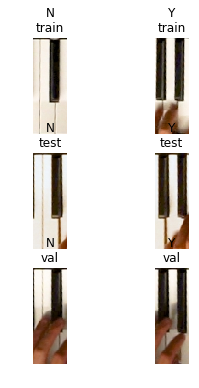

In [6]:
# print several images with labels
fig, axarr = plt.subplots(3, 2, figsize=[4, 6])
for ii, _type in enumerate(['train', 'test', 'val']):

    print(f'Samples from X_{_type}: ')

    for imgb, noteb, _ in dataset.data_batch(type=_type, size='bundle', color='white', batch_size=2, NCHW=False, need_velocity=False, concatenate=concat):
        print(imgb.shape)
        print(noteb[0], noteb[1])
        axarr[ii,0].imshow(cv2.cvtColor(display_concat_img(imgb, 0), cv2.COLOR_BGR2RGB))
        axarr[ii,0].set_title(visualize_keys(noteb[0]) + '\n' + _type)
        axarr[ii,0].axis('off')
        axarr[ii,1].imshow(cv2.cvtColor(display_concat_img(imgb, 1), cv2.COLOR_BGR2RGB))
        axarr[ii,1].set_title(visualize_keys(noteb[1]) + '\n' + _type)
        axarr[ii,1].axis('off')
        break

plt.show()

In [11]:
wmodel = models.get_white_bundle_model(channels)
wmodel.train(dataset, batch_size=32, size='bundle', color='white',
             concatenate=concat,
             num_epochs=200,
             max_num=-1,
             learning_rate=1e-3,
             weight_decay=0.1,
             decay_every=10,
             decay_by=0.5,
             best_path='keypress_recognition/best_white_bundle_model.tar',
             current_path='keypress_recognition/current_white_bundle.tar',
             method=1)

Epoch 1/200


IntProgress(value=0, max=114354)

train Loss: 0.4451
[[51876  5687]
 [ 5308 51497]]
Precision: 0.91
Recall   : 0.90
Accuracy : 0.90


IntProgress(value=0, max=17228)

val Loss: 0.1586
[[11810   563]
 [  346  4529]]
Precision: 0.93
Recall   : 0.89
Accuracy : 0.95
The best model has been saved to keypress_recognition/best_white_bundle_model.tar ...
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 2/200


IntProgress(value=0, max=114354)

train Loss: 0.4032
[[51818  5089]
 [ 5366 52095]]
Precision: 0.91
Recall   : 0.91
Accuracy : 0.91


IntProgress(value=0, max=17228)

val Loss: 0.3970
[[9020   49]
 [3136 5043]]
Precision: 0.62
Recall   : 0.99
Accuracy : 0.82
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 3/200


IntProgress(value=0, max=114354)

train Loss: 0.3908
[[52358  4978]
 [ 4826 52206]]
Precision: 0.92
Recall   : 0.91
Accuracy : 0.91


IntProgress(value=0, max=17228)

val Loss: 0.2424
[[10952   267]
 [ 1204  4825]]
Precision: 0.80
Recall   : 0.95
Accuracy : 0.91
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 4/200


IntProgress(value=0, max=114354)

train Loss: 0.3845
[[52319  4829]
 [ 4865 52355]]
Precision: 0.91
Recall   : 0.92
Accuracy : 0.92


IntProgress(value=0, max=17228)

val Loss: 0.1896
[[11553   435]
 [  603  4657]]
Precision: 0.89
Recall   : 0.91
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 5/200


IntProgress(value=0, max=114354)

train Loss: 0.3870
[[52204  5067]
 [ 4980 52117]]
Precision: 0.91
Recall   : 0.91
Accuracy : 0.91


IntProgress(value=0, max=17228)

val Loss: 0.2358
[[11084   338]
 [ 1072  4754]]
Precision: 0.82
Recall   : 0.93
Accuracy : 0.92
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 6/200


IntProgress(value=0, max=114354)

train Loss: 0.3876
[[52409  5044]
 [ 4775 52140]]
Precision: 0.92
Recall   : 0.91
Accuracy : 0.91


IntProgress(value=0, max=17228)

val Loss: 0.3527
[[9904  416]
 [2252 4676]]
Precision: 0.67
Recall   : 0.92
Accuracy : 0.85
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 7/200


IntProgress(value=0, max=114354)

train Loss: 0.3777
[[52515  5196]
 [ 4669 51988]]
Precision: 0.92
Recall   : 0.91
Accuracy : 0.91


IntProgress(value=0, max=17228)

val Loss: 0.4402
[[8760   47]
 [3396 5045]]
Precision: 0.60
Recall   : 0.99
Accuracy : 0.80
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 8/200


IntProgress(value=0, max=114354)

train Loss: 0.3775
[[52251  4923]
 [ 4933 52261]]
Precision: 0.91
Recall   : 0.91
Accuracy : 0.91


IntProgress(value=0, max=17228)

val Loss: 1.1180
[[4509   27]
 [7647 5065]]
Precision: 0.40
Recall   : 0.99
Accuracy : 0.56
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 9/200


IntProgress(value=0, max=114354)

train Loss: 0.3799
[[52259  4880]
 [ 4925 52304]]
Precision: 0.91
Recall   : 0.91
Accuracy : 0.91


IntProgress(value=0, max=17228)

val Loss: 0.2724
[[10976   393]
 [ 1180  4699]]
Precision: 0.80
Recall   : 0.92
Accuracy : 0.91
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 10/200


IntProgress(value=0, max=114354)

train Loss: 0.3343
[[53951  3972]
 [ 3233 53212]]
Precision: 0.94
Recall   : 0.93
Accuracy : 0.94


IntProgress(value=0, max=17228)

val Loss: 0.2098
[[11936  1041]
 [  220  4051]]
Precision: 0.95
Recall   : 0.80
Accuracy : 0.93
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 11/200


IntProgress(value=0, max=114354)

train Loss: 0.3295
[[53958  3896]
 [ 3226 53288]]
Precision: 0.94
Recall   : 0.93
Accuracy : 0.94


IntProgress(value=0, max=17228)

val Loss: 0.2196
[[11263   401]
 [  893  4691]]
Precision: 0.84
Recall   : 0.92
Accuracy : 0.92
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 12/200


IntProgress(value=0, max=114354)

train Loss: 0.3291
[[53833  3990]
 [ 3351 53194]]
Precision: 0.94
Recall   : 0.93
Accuracy : 0.94


IntProgress(value=0, max=17228)

val Loss: 0.2117
[[11520   340]
 [  636  4752]]
Precision: 0.88
Recall   : 0.93
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 13/200


IntProgress(value=0, max=114354)

train Loss: 0.3289
[[54020  3781]
 [ 3164 53403]]
Precision: 0.94
Recall   : 0.93
Accuracy : 0.94


IntProgress(value=0, max=17228)

val Loss: 0.2215
[[11408   395]
 [  748  4697]]
Precision: 0.86
Recall   : 0.92
Accuracy : 0.93
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 14/200


IntProgress(value=0, max=114354)

train Loss: 0.3284
[[54026  3892]
 [ 3158 53292]]
Precision: 0.94
Recall   : 0.93
Accuracy : 0.94


IntProgress(value=0, max=17228)

val Loss: 0.1997
[[11338   425]
 [  818  4667]]
Precision: 0.85
Recall   : 0.92
Accuracy : 0.93
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 15/200


IntProgress(value=0, max=114354)

train Loss: 0.3254
[[53924  3796]
 [ 3260 53388]]
Precision: 0.94
Recall   : 0.93
Accuracy : 0.94


IntProgress(value=0, max=17228)

val Loss: 0.1620
[[11898   664]
 [  258  4428]]
Precision: 0.94
Recall   : 0.87
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 16/200


IntProgress(value=0, max=114354)

train Loss: 0.3274
[[53874  3755]
 [ 3310 53429]]
Precision: 0.94
Recall   : 0.93
Accuracy : 0.94


IntProgress(value=0, max=17228)

val Loss: 0.2115
[[11592   513]
 [  564  4579]]
Precision: 0.89
Recall   : 0.90
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 17/200


IntProgress(value=0, max=114354)

train Loss: 0.3260
[[53798  3804]
 [ 3386 53380]]
Precision: 0.94
Recall   : 0.93
Accuracy : 0.94


IntProgress(value=0, max=17228)

val Loss: 0.1669
[[11740   510]
 [  416  4582]]
Precision: 0.92
Recall   : 0.90
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 18/200


IntProgress(value=0, max=114354)

train Loss: 0.3232
[[53893  3712]
 [ 3291 53472]]
Precision: 0.94
Recall   : 0.94
Accuracy : 0.94


IntProgress(value=0, max=17228)

val Loss: 0.3205
[[9899   80]
 [2257 5012]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.86
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 19/200


IntProgress(value=0, max=114354)

train Loss: 0.3211
[[54039  3747]
 [ 3145 53437]]
Precision: 0.94
Recall   : 0.93
Accuracy : 0.94


IntProgress(value=0, max=17228)

val Loss: 0.1586
[[11837   560]
 [  319  4532]]
Precision: 0.93
Recall   : 0.89
Accuracy : 0.95
The best model has been saved to keypress_recognition/best_white_bundle_model.tar ...
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 20/200


IntProgress(value=0, max=114354)

train Loss: 0.2917
[[54743  3167]
 [ 2441 54017]]
Precision: 0.96
Recall   : 0.94
Accuracy : 0.95


IntProgress(value=0, max=17228)

val Loss: 0.2439
[[10764   163]
 [ 1392  4929]]
Precision: 0.78
Recall   : 0.97
Accuracy : 0.91
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 21/200


IntProgress(value=0, max=114354)

train Loss: 0.2870
[[54747  3105]
 [ 2437 54079]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.95


IntProgress(value=0, max=17228)

val Loss: 0.1901
[[11241   146]
 [  915  4946]]
Precision: 0.84
Recall   : 0.97
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 22/200


IntProgress(value=0, max=114354)

train Loss: 0.2850
[[54704  3033]
 [ 2480 54151]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.95


IntProgress(value=0, max=17228)

val Loss: 0.1756
[[11489   157]
 [  667  4935]]
Precision: 0.88
Recall   : 0.97
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 23/200


IntProgress(value=0, max=114354)

train Loss: 0.2852
[[54708  3039]
 [ 2476 54145]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.95


IntProgress(value=0, max=17228)

val Loss: 0.1686
[[11829   593]
 [  327  4499]]
Precision: 0.93
Recall   : 0.88
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 24/200


IntProgress(value=0, max=114354)

train Loss: 0.2862
[[54782  3064]
 [ 2402 54120]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.95


IntProgress(value=0, max=17228)

val Loss: 0.2148
[[11153   174]
 [ 1003  4918]]
Precision: 0.83
Recall   : 0.97
Accuracy : 0.93
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 25/200


IntProgress(value=0, max=114354)

train Loss: 0.2826
[[54767  3028]
 [ 2417 54156]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.95


IntProgress(value=0, max=17228)

val Loss: 0.1709
[[11927   554]
 [  229  4538]]
Precision: 0.95
Recall   : 0.89
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 26/200


IntProgress(value=0, max=114354)

train Loss: 0.2839
[[54672  3048]
 [ 2512 54136]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.95


IntProgress(value=0, max=17228)

val Loss: 0.1817
[[11522   339]
 [  634  4753]]
Precision: 0.88
Recall   : 0.93
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 27/200


IntProgress(value=0, max=114354)

train Loss: 0.2820
[[54821  3046]
 [ 2363 54138]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.95


IntProgress(value=0, max=17228)

val Loss: 0.2519
[[10967   344]
 [ 1189  4748]]
Precision: 0.80
Recall   : 0.93
Accuracy : 0.91
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 28/200


IntProgress(value=0, max=114354)

train Loss: 0.2806
[[54789  3009]
 [ 2395 54175]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.95


IntProgress(value=0, max=17228)

val Loss: 0.1633
[[11735   344]
 [  421  4748]]
Precision: 0.92
Recall   : 0.93
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 29/200


IntProgress(value=0, max=114354)

train Loss: 0.2798
[[54741  3003]
 [ 2443 54181]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.95


IntProgress(value=0, max=17228)

val Loss: 0.2078
[[11109   124]
 [ 1047  4968]]
Precision: 0.83
Recall   : 0.98
Accuracy : 0.93
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 30/200


IntProgress(value=0, max=114354)

train Loss: 0.2575
[[55190  2683]
 [ 1994 54501]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.1536
[[11643   184]
 [  513  4908]]
Precision: 0.91
Recall   : 0.96
Accuracy : 0.96
The best model has been saved to keypress_recognition/best_white_bundle_model.tar ...
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 31/200


IntProgress(value=0, max=114354)

train Loss: 0.2560
[[55196  2627]
 [ 1988 54557]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.1598
[[11564   214]
 [  592  4878]]
Precision: 0.89
Recall   : 0.96
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 32/200


IntProgress(value=0, max=114354)

train Loss: 0.2552
[[55212  2637]
 [ 1972 54547]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.2216
[[10922    45]
 [ 1234  5047]]
Precision: 0.80
Recall   : 0.99
Accuracy : 0.93
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 33/200


IntProgress(value=0, max=114354)

train Loss: 0.2538
[[55191  2629]
 [ 1993 54555]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.1356
[[11699   281]
 [  457  4811]]
Precision: 0.91
Recall   : 0.94
Accuracy : 0.96
The best model has been saved to keypress_recognition/best_white_bundle_model.tar ...
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 34/200


IntProgress(value=0, max=114354)

train Loss: 0.2549
[[55205  2671]
 [ 1979 54513]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.2047
[[11274   185]
 [  882  4907]]
Precision: 0.85
Recall   : 0.96
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 35/200


IntProgress(value=0, max=114354)

train Loss: 0.2540
[[55156  2576]
 [ 2028 54608]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.1533
[[11590   182]
 [  566  4910]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 36/200


IntProgress(value=0, max=114354)

train Loss: 0.2530
[[55223  2639]
 [ 1961 54545]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.1740
[[11474   182]
 [  682  4910]]
Precision: 0.88
Recall   : 0.96
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 37/200


IntProgress(value=0, max=114354)

train Loss: 0.2535
[[55219  2593]
 [ 1965 54591]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.2380
[[10839    56]
 [ 1317  5036]]
Precision: 0.79
Recall   : 0.99
Accuracy : 0.92
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 38/200


IntProgress(value=0, max=114354)

train Loss: 0.2524
[[55256  2597]
 [ 1928 54587]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.1614
[[11681   292]
 [  475  4800]]
Precision: 0.91
Recall   : 0.94
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 39/200


IntProgress(value=0, max=114354)

train Loss: 0.2530
[[55243  2611]
 [ 1941 54573]]
Precision: 0.97
Recall   : 0.95
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.1538
[[11571   176]
 [  585  4916]]
Precision: 0.89
Recall   : 0.97
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 40/200


IntProgress(value=0, max=114354)

train Loss: 0.2381
[[55419  2445]
 [ 1765 54739]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.1397
[[11830   367]
 [  326  4725]]
Precision: 0.94
Recall   : 0.93
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 41/200


IntProgress(value=0, max=114354)

train Loss: 0.2370
[[55437  2357]
 [ 1747 54827]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.1696
[[11457   150]
 [  699  4942]]
Precision: 0.88
Recall   : 0.97
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 42/200


IntProgress(value=0, max=114354)

train Loss: 0.2374
[[55469  2393]
 [ 1715 54791]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.1486
[[11754   232]
 [  402  4860]]
Precision: 0.92
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 43/200


IntProgress(value=0, max=114354)

train Loss: 0.2366
[[55469  2400]
 [ 1715 54784]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.1665
[[11492   146]
 [  664  4946]]
Precision: 0.88
Recall   : 0.97
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 44/200


IntProgress(value=0, max=114354)

train Loss: 0.2367
[[55443  2319]
 [ 1741 54865]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.1442
[[11700   224]
 [  456  4868]]
Precision: 0.91
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 45/200


IntProgress(value=0, max=114354)

train Loss: 0.2361
[[55444  2375]
 [ 1740 54809]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.1704
[[11536   225]
 [  620  4867]]
Precision: 0.89
Recall   : 0.96
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 46/200


IntProgress(value=0, max=114354)

train Loss: 0.2361
[[55457  2357]
 [ 1727 54827]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.1727
[[11372   153]
 [  784  4939]]
Precision: 0.86
Recall   : 0.97
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 47/200


IntProgress(value=0, max=114354)

train Loss: 0.2360
[[55451  2385]
 [ 1733 54799]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.1523
[[11598   182]
 [  558  4910]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 48/200


IntProgress(value=0, max=114354)

train Loss: 0.2353
[[55444  2399]
 [ 1740 54785]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.1382
[[11659   160]
 [  497  4932]]
Precision: 0.91
Recall   : 0.97
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 49/200


IntProgress(value=0, max=114354)

train Loss: 0.2355
[[55462  2344]
 [ 1722 54840]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=17228)

val Loss: 0.1545
[[11768   310]
 [  388  4782]]
Precision: 0.92
Recall   : 0.94
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 50/200


IntProgress(value=0, max=114354)

train Loss: 0.2273
[[55547  2202]
 [ 1637 54982]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1433
[[11726   230]
 [  430  4862]]
Precision: 0.92
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 51/200


IntProgress(value=0, max=114354)

train Loss: 0.2249
[[55536  2176]
 [ 1648 55008]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1421
[[11819   350]
 [  337  4742]]
Precision: 0.93
Recall   : 0.93
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 52/200


IntProgress(value=0, max=114354)

train Loss: 0.2260
[[55580  2239]
 [ 1604 54945]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1378
[[11746   237]
 [  410  4855]]
Precision: 0.92
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 53/200


IntProgress(value=0, max=114354)

train Loss: 0.2258
[[55554  2204]
 [ 1630 54980]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1429
[[11760   238]
 [  396  4854]]
Precision: 0.92
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 54/200


IntProgress(value=0, max=114354)

train Loss: 0.2242
[[55574  2177]
 [ 1610 55007]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1428
[[11717   195]
 [  439  4897]]
Precision: 0.92
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 55/200


IntProgress(value=0, max=114354)

train Loss: 0.2243
[[55552  2140]
 [ 1632 55044]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1752
[[11510   218]
 [  646  4874]]
Precision: 0.88
Recall   : 0.96
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 56/200


IntProgress(value=0, max=114354)

train Loss: 0.2251
[[55551  2191]
 [ 1633 54993]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1540
[[11853   482]
 [  303  4610]]
Precision: 0.94
Recall   : 0.91
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 57/200


IntProgress(value=0, max=114354)

train Loss: 0.2241
[[55572  2177]
 [ 1612 55007]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1385
[[11803   259]
 [  353  4833]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 58/200


IntProgress(value=0, max=114354)

train Loss: 0.2246
[[55537  2144]
 [ 1647 55040]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1489
[[11753   297]
 [  403  4795]]
Precision: 0.92
Recall   : 0.94
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 59/200


IntProgress(value=0, max=114354)

train Loss: 0.2245
[[55584  2197]
 [ 1600 54987]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1462
[[11662   146]
 [  494  4946]]
Precision: 0.91
Recall   : 0.97
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 60/200


IntProgress(value=0, max=114354)

train Loss: 0.2195
[[55614  2113]
 [ 1570 55071]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1451
[[11780   306]
 [  376  4786]]
Precision: 0.93
Recall   : 0.94
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 61/200


IntProgress(value=0, max=114354)

train Loss: 0.2183
[[55573  2128]
 [ 1611 55056]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1455
[[11664   161]
 [  492  4931]]
Precision: 0.91
Recall   : 0.97
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 62/200


IntProgress(value=0, max=114354)

train Loss: 0.2190
[[55602  2108]
 [ 1582 55076]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1480
[[11703   216]
 [  453  4876]]
Precision: 0.91
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 63/200


IntProgress(value=0, max=114354)

train Loss: 0.2182
[[55607  2128]
 [ 1577 55056]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1641
[[11596   248]
 [  560  4844]]
Precision: 0.90
Recall   : 0.95
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 64/200


IntProgress(value=0, max=114354)

train Loss: 0.2182
[[55633  2149]
 [ 1551 55035]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1442
[[11688   201]
 [  468  4891]]
Precision: 0.91
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 65/200


IntProgress(value=0, max=114354)

train Loss: 0.2184
[[55595  2127]
 [ 1589 55057]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1608
[[11584   182]
 [  572  4910]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 66/200


IntProgress(value=0, max=114354)

train Loss: 0.2173
[[55595  2103]
 [ 1589 55081]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1558
[[11644   203]
 [  512  4889]]
Precision: 0.91
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 67/200


IntProgress(value=0, max=114354)

train Loss: 0.2174
[[55601  2082]
 [ 1583 55102]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1517
[[11690   235]
 [  466  4857]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 68/200


IntProgress(value=0, max=114354)

train Loss: 0.2177
[[55606  2072]
 [ 1578 55112]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1498
[[11697   250]
 [  459  4842]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 69/200


IntProgress(value=0, max=114354)

train Loss: 0.2175
[[55604  2079]
 [ 1580 55105]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1625
[[11586   221]
 [  570  4871]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 70/200


IntProgress(value=0, max=114354)

train Loss: 0.2150
[[55621  2029]
 [ 1563 55155]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1457
[[11768   311]
 [  388  4781]]
Precision: 0.92
Recall   : 0.94
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 71/200


IntProgress(value=0, max=114354)

train Loss: 0.2139
[[55627  2028]
 [ 1557 55156]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1557
[[11608   196]
 [  548  4896]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 72/200


IntProgress(value=0, max=114354)

train Loss: 0.2145
[[55604  2025]
 [ 1580 55159]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1506
[[11773   316]
 [  383  4776]]
Precision: 0.93
Recall   : 0.94
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 73/200


IntProgress(value=0, max=114354)

train Loss: 0.2142
[[55610  2015]
 [ 1574 55169]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1557
[[11620   200]
 [  536  4892]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 74/200


IntProgress(value=0, max=114354)

train Loss: 0.2143
[[55642  2067]
 [ 1542 55117]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1523
[[11688   238]
 [  468  4854]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 75/200


IntProgress(value=0, max=114354)

train Loss: 0.2137
[[55639  2026]
 [ 1545 55158]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1458
[[11720   254]
 [  436  4838]]
Precision: 0.92
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 76/200


IntProgress(value=0, max=114354)

train Loss: 0.2141
[[55634  1999]
 [ 1550 55185]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1497
[[11707   241]
 [  449  4851]]
Precision: 0.92
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 77/200


IntProgress(value=0, max=114354)

train Loss: 0.2135
[[55634  2020]
 [ 1550 55164]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1602
[[11592   196]
 [  564  4896]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 78/200


IntProgress(value=0, max=114354)

train Loss: 0.2138
[[55631  2021]
 [ 1553 55163]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1489
[[11676   204]
 [  480  4888]]
Precision: 0.91
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 79/200


IntProgress(value=0, max=114354)

train Loss: 0.2136
[[55641  2018]
 [ 1543 55166]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1539
[[11690   244]
 [  466  4848]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 80/200


IntProgress(value=0, max=114354)

train Loss: 0.2126
[[55646  1994]
 [ 1538 55190]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1566
[[11615   198]
 [  541  4894]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 81/200


IntProgress(value=0, max=114354)

train Loss: 0.2121
[[55644  2000]
 [ 1540 55184]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1587
[[11592   190]
 [  564  4902]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 82/200


IntProgress(value=0, max=114354)

train Loss: 0.2112
[[55647  1992]
 [ 1537 55192]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1563
[[11662   236]
 [  494  4856]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 83/200


IntProgress(value=0, max=114354)

train Loss: 0.2111
[[55665  2001]
 [ 1519 55183]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1608
[[11581   196]
 [  575  4896]]
Precision: 0.89
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 84/200


IntProgress(value=0, max=114354)

train Loss: 0.2118
[[55646  2015]
 [ 1538 55169]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1566
[[11637   223]
 [  519  4869]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 85/200


IntProgress(value=0, max=114354)

train Loss: 0.2110
[[55663  1990]
 [ 1521 55194]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1513
[[11706   247]
 [  450  4845]]
Precision: 0.92
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 86/200


IntProgress(value=0, max=114354)

train Loss: 0.2115
[[55659  2010]
 [ 1525 55174]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1547
[[11613   199]
 [  543  4893]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 87/200


IntProgress(value=0, max=114354)

train Loss: 0.2117
[[55627  1977]
 [ 1557 55207]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1543
[[11679   238]
 [  477  4854]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 88/200


IntProgress(value=0, max=114354)

train Loss: 0.2119
[[55666  2007]
 [ 1518 55177]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1571
[[11669   228]
 [  487  4864]]
Precision: 0.91
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 89/200


IntProgress(value=0, max=114354)

train Loss: 0.2109
[[55657  2002]
 [ 1527 55182]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1567
[[11623   212]
 [  533  4880]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 90/200


IntProgress(value=0, max=114354)

train Loss: 0.2114
[[55661  1991]
 [ 1523 55193]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1584
[[11616   214]
 [  540  4878]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 91/200


IntProgress(value=0, max=114354)

train Loss: 0.2105
[[55645  2005]
 [ 1539 55179]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1540
[[11680   250]
 [  476  4842]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 92/200


IntProgress(value=0, max=114354)

train Loss: 0.2101
[[55651  1975]
 [ 1533 55209]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1598
[[11593   208]
 [  563  4884]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 93/200


IntProgress(value=0, max=114354)

train Loss: 0.2102
[[55655  2003]
 [ 1529 55181]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1541
[[11676   229]
 [  480  4863]]
Precision: 0.91
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 94/200


IntProgress(value=0, max=114354)

train Loss: 0.2103
[[55639  1994]
 [ 1545 55190]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1557
[[11655   223]
 [  501  4869]]
Precision: 0.91
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 95/200


IntProgress(value=0, max=114354)

train Loss: 0.2100
[[55669  1999]
 [ 1515 55185]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1607
[[11593   214]
 [  563  4878]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 96/200


IntProgress(value=0, max=114354)

train Loss: 0.2102
[[55666  1992]
 [ 1518 55192]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1603
[[11584   195]
 [  572  4897]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 97/200


IntProgress(value=0, max=114354)

train Loss: 0.2105
[[55646  1970]
 [ 1538 55214]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1520
[[11701   256]
 [  455  4836]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 98/200


IntProgress(value=0, max=114354)

train Loss: 0.2095
[[55651  1987]
 [ 1533 55197]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1516
[[11700   257]
 [  456  4835]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 99/200


IntProgress(value=0, max=114354)

train Loss: 0.2103
[[55648  1994]
 [ 1536 55190]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1627
[[11612   220]
 [  544  4872]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 100/200


IntProgress(value=0, max=114354)

train Loss: 0.2097
[[55662  1991]
 [ 1522 55193]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1555
[[11671   232]
 [  485  4860]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 101/200


IntProgress(value=0, max=114354)

train Loss: 0.2101
[[55669  2002]
 [ 1515 55182]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1593
[[11626   208]
 [  530  4884]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 102/200


IntProgress(value=0, max=114354)

train Loss: 0.2099
[[55663  1986]
 [ 1521 55198]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1528
[[11681   243]
 [  475  4849]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 103/200


IntProgress(value=0, max=114354)

train Loss: 0.2097
[[55657  1996]
 [ 1527 55188]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1542
[[11677   231]
 [  479  4861]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 104/200


IntProgress(value=0, max=114354)

train Loss: 0.2095
[[55673  1970]
 [ 1511 55214]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1559
[[11673   232]
 [  483  4860]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 105/200


IntProgress(value=0, max=114354)

train Loss: 0.2095
[[55653  1995]
 [ 1531 55189]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1567
[[11642   233]
 [  514  4859]]
Precision: 0.90
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 106/200


IntProgress(value=0, max=114354)

train Loss: 0.2089
[[55667  1988]
 [ 1517 55196]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1593
[[11615   210]
 [  541  4882]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 107/200


IntProgress(value=0, max=114354)

train Loss: 0.2091
[[55664  2004]
 [ 1520 55180]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1602
[[11611   208]
 [  545  4884]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 108/200


IntProgress(value=0, max=114354)

train Loss: 0.2095
[[55686  1973]
 [ 1498 55211]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1589
[[11643   220]
 [  513  4872]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 109/200


IntProgress(value=0, max=114354)

train Loss: 0.2091
[[55664  2003]
 [ 1520 55181]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1574
[[11625   222]
 [  531  4870]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 110/200


IntProgress(value=0, max=114354)

train Loss: 0.2093
[[55675  1990]
 [ 1509 55194]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1535
[[11681   239]
 [  475  4853]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 111/200


IntProgress(value=0, max=114354)

train Loss: 0.2088
[[55677  1985]
 [ 1507 55199]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1571
[[11623   210]
 [  533  4882]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 112/200


IntProgress(value=0, max=114354)

train Loss: 0.2088
[[55675  1978]
 [ 1509 55206]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1521
[[11689   245]
 [  467  4847]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 113/200


IntProgress(value=0, max=114354)

train Loss: 0.2084
[[55667  1965]
 [ 1517 55219]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1553
[[11680   237]
 [  476  4855]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 114/200


IntProgress(value=0, max=114354)

train Loss: 0.2085
[[55674  1979]
 [ 1510 55205]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1523
[[11711   274]
 [  445  4818]]
Precision: 0.92
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 115/200


IntProgress(value=0, max=114354)

train Loss: 0.2083
[[55679  2003]
 [ 1505 55181]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1544
[[11658   227]
 [  498  4865]]
Precision: 0.91
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 116/200


IntProgress(value=0, max=114354)

train Loss: 0.2086
[[55664  1973]
 [ 1520 55211]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1562
[[11664   225]
 [  492  4867]]
Precision: 0.91
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 117/200


IntProgress(value=0, max=114354)

train Loss: 0.2084
[[55674  1979]
 [ 1510 55205]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1566
[[11655   227]
 [  501  4865]]
Precision: 0.91
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 118/200


IntProgress(value=0, max=114354)

train Loss: 0.2086
[[55679  1985]
 [ 1505 55199]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1562
[[11630   211]
 [  526  4881]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 119/200


IntProgress(value=0, max=114354)

train Loss: 0.2087
[[55661  1971]
 [ 1523 55213]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1571
[[11638   219]
 [  518  4873]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 120/200


IntProgress(value=0, max=114354)

train Loss: 0.2088
[[55666  1993]
 [ 1518 55191]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1552
[[11660   243]
 [  496  4849]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 121/200


IntProgress(value=0, max=114354)

train Loss: 0.2083
[[55671  1980]
 [ 1513 55204]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1540
[[11664   248]
 [  492  4844]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 122/200


IntProgress(value=0, max=114354)

train Loss: 0.2080
[[55675  1983]
 [ 1509 55201]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1510
[[11685   251]
 [  471  4841]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 123/200


IntProgress(value=0, max=114354)

train Loss: 0.2084
[[55665  1969]
 [ 1519 55215]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1593
[[11635   220]
 [  521  4872]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 124/200


IntProgress(value=0, max=114354)

train Loss: 0.2082
[[55671  1972]
 [ 1513 55212]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1589
[[11649   235]
 [  507  4857]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 125/200


IntProgress(value=0, max=114354)

train Loss: 0.2084
[[55664  1950]
 [ 1520 55234]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1537
[[11662   227]
 [  494  4865]]
Precision: 0.91
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 126/200


IntProgress(value=0, max=114354)

train Loss: 0.2087
[[55664  1982]
 [ 1520 55202]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1562
[[11636   222]
 [  520  4870]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 127/200


IntProgress(value=0, max=114354)

train Loss: 0.2078
[[55678  1967]
 [ 1506 55217]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1556
[[11653   247]
 [  503  4845]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 128/200


IntProgress(value=0, max=114354)

train Loss: 0.2081
[[55667  1970]
 [ 1517 55214]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1554
[[11660   232]
 [  496  4860]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 129/200


IntProgress(value=0, max=114354)

train Loss: 0.2074
[[55670  1966]
 [ 1514 55218]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1540
[[11686   263]
 [  470  4829]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 130/200


IntProgress(value=0, max=114354)

train Loss: 0.2081
[[55661  1980]
 [ 1523 55204]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1554
[[11667   247]
 [  489  4845]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 131/200


IntProgress(value=0, max=114354)

train Loss: 0.2077
[[55669  1971]
 [ 1515 55213]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1553
[[11668   235]
 [  488  4857]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 132/200


IntProgress(value=0, max=114354)

train Loss: 0.2077
[[55680  1993]
 [ 1504 55191]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1536
[[11669   248]
 [  487  4844]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 133/200


IntProgress(value=0, max=114354)

train Loss: 0.2083
[[55676  1977]
 [ 1508 55207]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1592
[[11614   211]
 [  542  4881]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 134/200


IntProgress(value=0, max=114354)

train Loss: 0.2083
[[55678  1962]
 [ 1506 55222]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1544
[[11673   251]
 [  483  4841]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 135/200


IntProgress(value=0, max=114354)

train Loss: 0.2085
[[55673  1973]
 [ 1511 55211]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1575
[[11665   247]
 [  491  4845]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 136/200


IntProgress(value=0, max=114354)

train Loss: 0.2082
[[55664  1974]
 [ 1520 55210]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1520
[[11707   274]
 [  449  4818]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 137/200


IntProgress(value=0, max=114354)

train Loss: 0.2081
[[55668  1957]
 [ 1516 55227]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1562
[[11664   246]
 [  492  4846]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 138/200


IntProgress(value=0, max=114354)

train Loss: 0.2087
[[55678  1990]
 [ 1506 55194]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1541
[[11676   245]
 [  480  4847]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 139/200


IntProgress(value=0, max=114354)

train Loss: 0.2081
[[55661  1968]
 [ 1523 55216]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1565
[[11665   240]
 [  491  4852]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 140/200


IntProgress(value=0, max=114354)

train Loss: 0.2084
[[55683  1981]
 [ 1501 55203]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1551
[[11659   224]
 [  497  4868]]
Precision: 0.91
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 141/200


IntProgress(value=0, max=114354)

train Loss: 0.2084
[[55664  1989]
 [ 1520 55195]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1521
[[11685   250]
 [  471  4842]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 142/200


IntProgress(value=0, max=114354)

train Loss: 0.2075
[[55672  1979]
 [ 1512 55205]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1544
[[11667   233]
 [  489  4859]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 143/200


IntProgress(value=0, max=114354)

train Loss: 0.2082
[[55679  1987]
 [ 1505 55197]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1551
[[11669   253]
 [  487  4839]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 144/200


IntProgress(value=0, max=114354)

train Loss: 0.2081
[[55680  1973]
 [ 1504 55211]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1564
[[11649   238]
 [  507  4854]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 145/200


IntProgress(value=0, max=114354)

train Loss: 0.2076
[[55666  1971]
 [ 1518 55213]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1570
[[11653   222]
 [  503  4870]]
Precision: 0.91
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 146/200


IntProgress(value=0, max=114354)

train Loss: 0.2083
[[55673  1959]
 [ 1511 55225]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1599
[[11623   214]
 [  533  4878]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 147/200


IntProgress(value=0, max=114354)

train Loss: 0.2080
[[55678  1964]
 [ 1506 55220]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1591
[[11631   239]
 [  525  4853]]
Precision: 0.90
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 148/200


IntProgress(value=0, max=114354)

train Loss: 0.2081
[[55672  1988]
 [ 1512 55196]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1578
[[11641   246]
 [  515  4846]]
Precision: 0.90
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 149/200


IntProgress(value=0, max=114354)

train Loss: 0.2077
[[55676  1979]
 [ 1508 55205]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1551
[[11672   239]
 [  484  4853]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 150/200


IntProgress(value=0, max=114354)

train Loss: 0.2081
[[55686  1977]
 [ 1498 55207]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1571
[[11673   254]
 [  483  4838]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 151/200


IntProgress(value=0, max=114354)

train Loss: 0.2080
[[55677  1976]
 [ 1507 55208]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1565
[[11655   228]
 [  501  4864]]
Precision: 0.91
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 152/200


IntProgress(value=0, max=114354)

train Loss: 0.2079
[[55669  1964]
 [ 1515 55220]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1563
[[11637   218]
 [  519  4874]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 153/200


IntProgress(value=0, max=114354)

train Loss: 0.2082
[[55675  1975]
 [ 1509 55209]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1531
[[11666   241]
 [  490  4851]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 154/200


IntProgress(value=0, max=114354)

train Loss: 0.2084
[[55679  1977]
 [ 1505 55207]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1523
[[11691   256]
 [  465  4836]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 155/200


IntProgress(value=0, max=114354)

train Loss: 0.2084
[[55675  1986]
 [ 1509 55198]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1543
[[11686   256]
 [  470  4836]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 156/200


IntProgress(value=0, max=114354)

train Loss: 0.2080
[[55677  1978]
 [ 1507 55206]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1569
[[11626   215]
 [  530  4877]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 157/200


IntProgress(value=0, max=114354)

train Loss: 0.2077
[[55679  1973]
 [ 1505 55211]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1558
[[11659   234]
 [  497  4858]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 158/200


IntProgress(value=0, max=114354)

train Loss: 0.2077
[[55676  1985]
 [ 1508 55199]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1545
[[11664   233]
 [  492  4859]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 159/200


IntProgress(value=0, max=114354)

train Loss: 0.2082
[[55673  1989]
 [ 1511 55195]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1560
[[11652   236]
 [  504  4856]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 160/200


IntProgress(value=0, max=114354)

train Loss: 0.2077
[[55682  1962]
 [ 1502 55222]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1541
[[11677   255]
 [  479  4837]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 161/200


IntProgress(value=0, max=114354)

train Loss: 0.2082
[[55677  1979]
 [ 1507 55205]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1544
[[11687   250]
 [  469  4842]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 162/200


IntProgress(value=0, max=114354)

train Loss: 0.2079
[[55678  1971]
 [ 1506 55213]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1538
[[11688   268]
 [  468  4824]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 163/200


IntProgress(value=0, max=114354)

train Loss: 0.2075
[[55681  1957]
 [ 1503 55227]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1555
[[11663   244]
 [  493  4848]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 164/200


IntProgress(value=0, max=114354)

train Loss: 0.2083
[[55687  1983]
 [ 1497 55201]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1592
[[11619   212]
 [  537  4880]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 165/200


IntProgress(value=0, max=114354)

train Loss: 0.2080
[[55673  1956]
 [ 1511 55228]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1529
[[11684   249]
 [  472  4843]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 166/200


IntProgress(value=0, max=114354)

train Loss: 0.2079
[[55681  1976]
 [ 1503 55208]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1536
[[11689   264]
 [  467  4828]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 167/200


IntProgress(value=0, max=114354)

train Loss: 0.2082
[[55667  1970]
 [ 1517 55214]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1550
[[11651   248]
 [  505  4844]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 168/200


IntProgress(value=0, max=114354)

train Loss: 0.2081
[[55679  1967]
 [ 1505 55217]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1571
[[11635   240]
 [  521  4852]]
Precision: 0.90
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 169/200


IntProgress(value=0, max=114354)

train Loss: 0.2079
[[55679  1965]
 [ 1505 55219]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1556
[[11644   225]
 [  512  4867]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 170/200


IntProgress(value=0, max=114354)

train Loss: 0.2081
[[55682  1995]
 [ 1502 55189]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1546
[[11654   231]
 [  502  4861]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 171/200


IntProgress(value=0, max=114354)

train Loss: 0.2080
[[55679  1979]
 [ 1505 55205]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1554
[[11677   260]
 [  479  4832]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 172/200


IntProgress(value=0, max=114354)

train Loss: 0.2078
[[55687  1963]
 [ 1497 55221]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1550
[[11675   252]
 [  481  4840]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 173/200


IntProgress(value=0, max=114354)

train Loss: 0.2083
[[55675  1980]
 [ 1509 55204]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1538
[[11674   251]
 [  482  4841]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 174/200


IntProgress(value=0, max=114354)

train Loss: 0.2077
[[55675  1977]
 [ 1509 55207]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1553
[[11654   240]
 [  502  4852]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 175/200


IntProgress(value=0, max=114354)

train Loss: 0.2071
[[55674  1955]
 [ 1510 55229]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1547
[[11676   243]
 [  480  4849]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 176/200


IntProgress(value=0, max=114354)

train Loss: 0.2079
[[55676  1975]
 [ 1508 55209]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1575
[[11632   224]
 [  524  4868]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 177/200


IntProgress(value=0, max=114354)

train Loss: 0.2081
[[55672  1964]
 [ 1512 55220]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1553
[[11674   253]
 [  482  4839]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 178/200


IntProgress(value=0, max=114354)

train Loss: 0.2083
[[55677  1977]
 [ 1507 55207]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1537
[[11678   242]
 [  478  4850]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 179/200


IntProgress(value=0, max=114354)

train Loss: 0.2079
[[55675  1987]
 [ 1509 55197]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1574
[[11643   221]
 [  513  4871]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 180/200


IntProgress(value=0, max=114354)

train Loss: 0.2080
[[55686  1977]
 [ 1498 55207]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1533
[[11688   273]
 [  468  4819]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 181/200


IntProgress(value=0, max=114354)

train Loss: 0.2077
[[55688  1976]
 [ 1496 55208]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1560
[[11664   233]
 [  492  4859]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 182/200


IntProgress(value=0, max=114354)

train Loss: 0.2082
[[55666  1984]
 [ 1518 55200]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1555
[[11660   243]
 [  496  4849]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 183/200


IntProgress(value=0, max=114354)

train Loss: 0.2076
[[55669  1976]
 [ 1515 55208]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1571
[[11642   221]
 [  514  4871]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 184/200


IntProgress(value=0, max=114354)

train Loss: 0.2080
[[55684  1972]
 [ 1500 55212]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1573
[[11637   221]
 [  519  4871]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 185/200


IntProgress(value=0, max=114354)

train Loss: 0.2081
[[55675  1961]
 [ 1509 55223]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1552
[[11664   230]
 [  492  4862]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 186/200


IntProgress(value=0, max=114354)

train Loss: 0.2082
[[55671  1963]
 [ 1513 55221]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1527
[[11691   261]
 [  465  4831]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 187/200


IntProgress(value=0, max=114354)

train Loss: 0.2082
[[55677  1969]
 [ 1507 55215]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1594
[[11645   246]
 [  511  4846]]
Precision: 0.90
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 188/200


IntProgress(value=0, max=114354)

train Loss: 0.2081
[[55691  1989]
 [ 1493 55195]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1554
[[11667   257]
 [  489  4835]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 189/200


IntProgress(value=0, max=114354)

train Loss: 0.2078
[[55672  1972]
 [ 1512 55212]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1551
[[11659   224]
 [  497  4868]]
Precision: 0.91
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 190/200


IntProgress(value=0, max=114354)

train Loss: 0.2079
[[55678  1976]
 [ 1506 55208]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1560
[[11661   246]
 [  495  4846]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 191/200


IntProgress(value=0, max=114354)

train Loss: 0.2079
[[55675  1965]
 [ 1509 55219]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1598
[[11635   222]
 [  521  4870]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 192/200


IntProgress(value=0, max=114354)

train Loss: 0.2079
[[55671  1977]
 [ 1513 55207]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1593
[[11633   217]
 [  523  4875]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 193/200


IntProgress(value=0, max=114354)

train Loss: 0.2079
[[55678  1980]
 [ 1506 55204]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1586
[[11640   235]
 [  516  4857]]
Precision: 0.90
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 194/200


IntProgress(value=0, max=114354)

train Loss: 0.2081
[[55673  1931]
 [ 1511 55253]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1544
[[11656   230]
 [  500  4862]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 195/200


IntProgress(value=0, max=114354)

train Loss: 0.2080
[[55675  1969]
 [ 1509 55215]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1573
[[11633   227]
 [  523  4865]]
Precision: 0.90
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 196/200


IntProgress(value=0, max=114354)

train Loss: 0.2079
[[55675  1974]
 [ 1509 55210]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1552
[[11647   221]
 [  509  4871]]
Precision: 0.91
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 197/200


IntProgress(value=0, max=114354)

train Loss: 0.2077
[[55672  1984]
 [ 1512 55200]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1580
[[11640   232]
 [  516  4860]]
Precision: 0.90
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 198/200


IntProgress(value=0, max=114354)

train Loss: 0.2083
[[55683  1953]
 [ 1501 55231]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1549
[[11654   231]
 [  502  4861]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 199/200


IntProgress(value=0, max=114354)

train Loss: 0.2076
[[55674  1986]
 [ 1510 55198]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1516
[[11683   247]
 [  473  4845]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 200/200


IntProgress(value=0, max=114354)

train Loss: 0.2077
[[55673  1962]
 [ 1511 55222]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=17228)

val Loss: 0.1556
[[11666   241]
 [  490  4851]]
Precision: 0.91
Recall   : 0.95
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Training complete in 429m 49s
Best val loss: 0.135602


IntProgress(value=0, max=34132)

(12, 106, 37, 3)
tensor([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=torch.uint8)


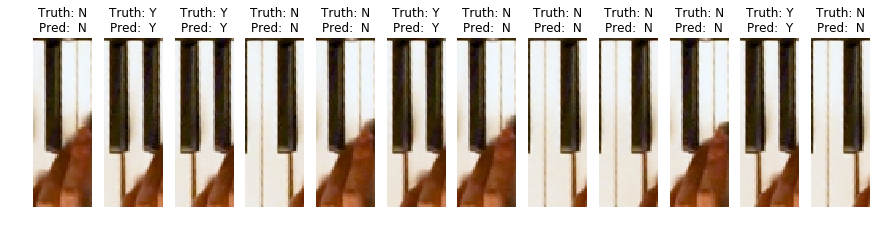

In [8]:
example_batch = 12
fig, axarr = plt.subplots(1, example_batch, figsize=(15,4))
for imgb, noteb, _ in dataset.data_batch(type='test', size='bundle', color='white', batch_size=example_batch, NCHW=True, need_velocity=False, concatenate=concat):
    yb = wmodel.evaluate(imgb, threshold=0.5)
    imgb = np.transpose(imgb, (0, 2, 3, 1))
    print(imgb.shape)
    print(yb)
    for i in range(example_batch):
        axarr[i].imshow(cv2.cvtColor(display_concat_img(imgb, i), cv2.COLOR_BGR2RGB))
        axarr[i].set_title('Truth: ' + visualize_keys(noteb[i]) + '\nPred:  ' + visualize_keys(yb[i]))
        axarr[i].axis('off')
    break
plt.show()